In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gensim

In [4]:
df = pd.read_json("../data/processed_data/fixed_processed_after_NEMO.json")
dti = pd.to_datetime(df[["year", "month", "day", "hour"]], errors="coerce")
df["time"] = dti
df

,paragraph,hour,day,month,year,filename,time,lemmatized_text,nemo_status
0,"תם שימוע ראש הממשלה, בינימין נתניהו: לאחר עשר ...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,תם שימוע ראש ה ממשלה _ ב ינימין נתניהו _ לאחר ...,True
1,"גבר בן שלושים נורה ברחוב העלייה בלוד, מצבו קשה...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,גבר בן שלושים נורה ב רחוב ה עלייה ב לוד _ מצב ...,True
2,"הרמטכ""ל, רב אלוף אביב כוכבי, מזהיר הערב: ""לא נ...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,"ה רמטכ""ל _ רב אלוף אביב כוכבי _ מזהיר הערב _ _...",True
3,שר התחבורה בצלאל סמוטריץ' הודיע בעמוד הפייסבוק...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,שר ה תחבורה בצלאל סמוטריץ' הודיע ב עמוד ה פייס...,True
4,נשיא ארצות הברית טראמפ הודיע כי יציב קווים אדו...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,נשיא ארץ ה ברית טראמפ הודיע כי הציב קו אדומי ל...,True
...,...,...,...,...,...,...,...,...,...
5140,הלימודים לא מתחדשים לפחות עד מחרתיים - רק הערב...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,ה לימודים לא התחדש לפחות עד מחרתיים _ רק הערב ...,True
5141,בחירות אלפיים עשרים ואחת: יושב ראש ימינה חבר ה...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,בחירות אלפיים עשרים ו אחת _ יושב ראש ימינה חבר...,True
5142,המחדל בנבטים: במהלך הלילה אותרה הנקודה בגדר שמ...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,ה מחדל ב נבטי _ ב מהלך ה לילה אותר ה נקודה בגד...,True
5143,"הדיונים על פתיחת המסחר באמצעות ""הדרכון הירוק"" ...",8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,ה דיון על פתיחה ה מסחר באמצעות _ ה דרכון ה ירו...,True


In [6]:
df = df[df.nemo_status]

In [7]:
print(df.loc[0, "lemmatized_text"])

תם שימוע ראש ה ממשלה _ ב ינימין נתניהו _ לאחר עשר שעה של דיון ב תיק אלף _ תיק ה תינה ה יום נחתם ארבעה יום ה שימוע _ כעת על ה יועץ ה משפטי ל ה ממשלה אביחי מנדלבליט החליט האם הגיש כתב אישום ב ארבעה ה תיק _ כ תבן יובל אראל מציין כי עורך ה דין הגיש סיכום כתוב אחרי סוכה _ ו הזכיר כי ה משנה ל פרקליט ה מדינה _ ליאת בן ארי _ נעדר מן ה שימוע ב ה יום ה אחרון _ בשל חופשה משפחתי _


# Stopwords

In [11]:
def get_hebrew_stopwords(top_k):
    stop_path="../added_material/heb_stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines=in_file.readlines()
        res=[l.strip() for l in lines]
        print(res[:top_k])
    return res

stop = set(get_hebrew_stopwords(100))
lemmatized_text = df["lemmatized_text"]

['את', 'לא', 'של', 'אני', 'על', 'זה', 'עם', 'כל', 'הוא', 'אם', 'או', 'גם', 'יותר', 'יש', 'לי', 'מה', 'אבל', 'פורום', 'אז', 'טוב', 'רק', 'כי', 'שלי', 'היה', 'בפורום', 'אין', 'עוד', 'היא', 'אחד', 'ב', 'ל', 'עד', 'לך', 'כמו', 'להיות', 'אתה', 'כמה', 'אנחנו', 'הם', 'כבר', 'אנשים', 'אפשר', 'תודה', 'שלא', 'אותו', 'ה', 'מאוד', 'הרבה', 'ולא', 'ממש', 'לו', 'א', 'מי', 'חיים', 'בית', 'שאני', 'יכול', 'שהוא', 'כך', 'הזה', 'איך', 'היום', 'קצת', 'עכשיו', 'שם', 'בכל', 'יהיה', 'תמיד', 'י', 'שלך', 'הכי', 'ש', 'בו', 'לעשות', 'צריך', 'כן', 'פעם', 'לכם', 'ואני', 'משהו', 'אל', 'שלו', 'שיש', 'ו', 'וגם', 'אתכם', 'אחרי', 'בנושא', 'כדי', 'פשוט', 'לפני', 'שזה', 'אותי', 'אנו', 'למה', 'דבר', 'כ', 'כאן', 'אולי', 'טובים']


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_stopwords_barchart(text, stop):
    #stop=set(stopwords.words('english'))
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    x=[w[::-1] for w in x]
    plt.bar(x,y)

In [ ]:
def invert_words(words):
    return [w[::-1] for w in words]

# Tokenization

In [5]:
text_data = df.paragraph.values.tolist()
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

data_words = list(sent_to_words(text_data))

# Bigrams and Trigrams

In [6]:
bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100)
bigram_mod = bigram.freeze()
trigram = gensim.models.Phrases(bigram[data_words], min_count=50, threshold=200)
trigram_mode = trigram.freeze()

In [7]:
from tqdm import tqdm
def make_bigrams(texts):
    return [bigram[doc] for doc in tqdm(texts)]

def make_trigrams(texts):
    return [trigram[bigram_mod[doc]] for doc in tqdm(texts)]

In [8]:
bigram_data_words = make_bigrams(data_words)

100%|██████████| 4660/4660 [00:00<00:00, 11602.89it/s]


In [9]:
trigram_data_words = make_trigrams(bigram_data_words)

100%|██████████| 4660/4660 [00:00<00:00, 8534.24it/s]


In [10]:
stop_grams = ["גלי_צהל", "בגלי_צהל"]

def remove_stopgrams(texts, stop_grams):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_grams] for doc in tqdm(texts)]

In [11]:
processed_data = remove_stopgrams(trigram_data_words, stop_grams)

100%|██████████| 4660/4660 [00:00<00:00, 14844.40it/s]


In [12]:
bigram.export_phrases()

{'היועץ_המשפטי': 503.55027932960894,
 'המשפטי_לממשלה': 524.4073914911904,
 'אביחי_מנדלבליט': 198.8283088235294,
 'יובל_אראל': 374.10971223021585,
 'מגן_דוד': 406.3004607833317,
 'דוד_אדום': 414.6192217781465,
 'אליאב_בטיטו': 695.6241558942697,
 'נשיא_ארצות': 157.15330780511653,
 'ארצות_הברית': 306.158702677747,
 'בארצות_הברית': 173.30913516609394,
 'אורן_פדידה': 345.91474780701753,
 'כחול_לבן': 335.6297626851973,
 'חבר_הכנסת': 188.1200410628839,
 'בני_גנץ': 102.53661242305178,
 'הפוליטי_מיכאל': 330.1666666666667,
 'מיכאל_האוזר': 645.7241887905604,
 'בתל_אביב': 276.7261530772526,
 'הממשלה_בנימין': 105.48558866634099,
 'בנימין_נתניהו': 129.51057149670137,
 'הרשימה_המשותפת': 157.00769342429962,
 'דורון_קדוש': 610.0897420935933,
 'עורך_הדין': 125.35313277704581,
 'בבאר_שבע': 234.65511684125707,
 'תל_אביב': 255.25961633175731,
 'אביגדור_ליברמן': 301.79296875,
 'בשבוע_שעבר': 140.01631067961165,
 'צוותי_מגן': 162.9081448227612,
 'לבית_החולים': 168.2758731833099,
 'צוות_מגן': 108.2430090924687

# Create dictionary and Corpus

In [13]:
import gensim.corpora as corpora

In [14]:
id2word = corpora.Dictionary(processed_data)

In [15]:
len(id2word)

34450

In [16]:
texts = processed_data
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)]


# Building LDA model

In [17]:
lda_model = gensim.models.LdaMulticore(corpus, 
                                   num_topics = 20, 
                                   id2word = id2word,                                    
                                   passes = 10,
                                   workers = 2)

In [18]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"ראש" + 0.009*"החינוך" + 0.009*"הממשלה" + 0.007*"נתניהו" + 0.005*"שר" '
  '+ 0.004*"אמר" + 0.003*"מחר" + 0.003*"מערכת" + 0.003*"יושב" + 0.003*"הסגר"'),
 (1,
  '0.013*"מכבי" + 0.012*"הפועל" + 0.007*"אפס" + 0.007*"תל_אביב" + '
  '0.007*"חדשות" + 0.007*"הספורט" + 0.006*"העל" + 0.005*"כדורגל" + '
  '0.005*"חיפה" + 0.005*"אריה"'),
 (2,
  '0.004*"הדין" + 0.004*"לציון" + 0.003*"גבר" + 0.003*"טיפול_רפואי" + '
  '0.003*"בירושלים" + 0.003*"שלושים" + 0.003*"ככל_הנראה" + 0.003*"אלף" + '
  '0.003*"האירוע" + 0.003*"ארבעים"'),
 (3,
  '0.005*"ראש" + 0.004*"במסגרת" + 0.004*"גונסון" + 0.003*"ראשון" + '
  '0.003*"החשוד" + 0.003*"מגן_דוד_אדום" + 0.003*"האלימות" + 0.003*"טקה" + '
  '0.003*"עמית" + 0.003*"הסגר"'),
 (4,
  '0.025*"ראש" + 0.020*"נתניהו" + 0.015*"הממשלה" + 0.008*"יושב" + 0.005*"הערב" '
  '+ 0.005*"שר" + 0.005*"כחול_לבן" + 0.004*"אמר" + 0.004*"גנץ" + '
  '0.004*"הכנסת"'),
 (5,
  '0.006*"רכב" + 0.006*"בני" + 0.006*"סמוך" + 0.005*"נפצעו" + 0.005*"שלושה" + '
  '0.005*"החינוך" + 0.004*

In [19]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.986508430770638

Coherence Score:  0.45420556814617025


In [20]:
import pyLDAvis
import pyLDAvis.gensim

In [21]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False)
vis

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.065001 -0.095037       1        1   5.529384
1      0.069456  0.216285       2        1   5.027622
2      0.100683  0.016084       3        1   2.768256
3      0.118393  0.004559       4        1   1.844764
4     -0.151965 -0.028434       5        1  12.501634
5      0.151117 -0.063661       6        1   5.300326
6     -0.110660 -0.007811       7        1   6.889111
7     -0.078615  0.037317       8        1   5.163161
8     -0.062116  0.026362       9        1   4.320010
9     -0.004114 -0.108442      10        1   8.702225
10    -0.005346 -0.040836      11        1   4.835042
11    -0.000655  0.031587      12        1   3.314565
12    -0.139381 -0.011221      13        1   6.331502
13     0.014493  0.073062      14        1   3.714164
14    -0.050020 -0.013462      15        1   5.093404
15     0.016230 -0.024736      16        1   4.273146
16     0.147892 -0.109654      17        1   4.725505
17     0.043638 -0.046771      18        1   3.038630
18     0.002354  0.124434      19        1   2.607855
19     0.003618  0.020376      20        1   4.019695, topic_info=             Term         Freq        Total Category  logprob  loglift
36         נתניהו   946.000000   946.000000  Default  30.0000  30.0000
561          מכבי   141.000000   141.000000  Default  29.0000  29.0000
203         הפועל   130.000000   130.000000  Default  28.0000  28.0000
612   לבית_החולים   162.000000   162.000000  Default  27.0000  27.0000
41            ראש  1568.000000  1568.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1172       העבודה    13.742998   102.291551  Topic20  -6.3692   1.2067
7618       לכתבנו    13.724270   101.150957  Topic20  -6.3705   1.2165
2158         בחשד    13.621154   102.403139  Topic20  -6.3781   1.1967
2012     בירושלים    13.947653   169.498043  Topic20  -6.3544   0.7164
429       לראשונה    13.960608   271.390488  Topic20  -6.3535   0.2466

[1555 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
34013     16  0.897074  anabtawi
2672       7  0.017282       אבו
2672       9  0.190100       אבו
2672      10  0.293791       אבו
2672      12  0.103691       אבו
...      ...       ...       ...
3910      15  0.095817       תקף
3910      16  0.055893       תקף
3910      18  0.031939       תקף
3910      20  0.023954       תקף
4810      20  0.866641      תרזה

[4647 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [22]:
from tqdm import tqdm 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.LdaMulticore(corpus, 
                                   num_topics = num_topics, 
                                   id2word = id2word,                                    
                                   passes = 10,
                                   workers = 2)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=processed_data, start=2, limit=40, step=6)


/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 7/7 [02:18<00:00, 19.82s/it]


/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


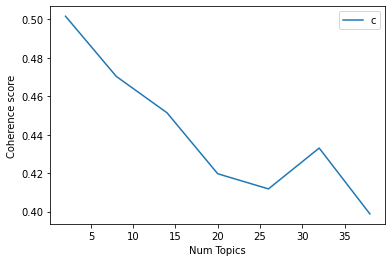

In [24]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [25]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5016
Num Topics = 8  has Coherence Value of 0.4703
Num Topics = 14  has Coherence Value of 0.4514
Num Topics = 20  has Coherence Value of 0.4197
Num Topics = 26  has Coherence Value of 0.4118
Num Topics = 32  has Coherence Value of 0.433
Num Topics = 38  has Coherence Value of 0.3988


/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.006*"טראמפ" + 0.005*"הבחירות" + 0.005*"אמר" + 0.005*"ראש" + 0.004*"פי" + '
  '0.004*"לאחר" + 0.004*"הנשיא" + 0.003*"המפלגה" + 0.003*"נתניהו" + '
  '0.003*"ביידן"'),
 (1,
  '0.007*"החינוך" + 0.007*"שר" + 0.003*"הממשלה" + 0.003*"אמר" + '
  '0.003*"משרד_הבריאות" + 0.003*"בישראל" + 0.003*"מערכת" + 0.003*"הערב" + '
  '0.003*"הקורונה" + 0.003*"החוץ"'),
 (2,
  '0.008*"ראש" + 0.005*"הבחירות" + 0.005*"הכנסת" + 0.004*"נתניהו" + '
  '0.004*"חבר_הכנסת" + 0.004*"עשרים" + 0.003*"וחמש" + 0.003*"יושב" + '
  '0.003*"אמר" + 0.003*"עשרה"'),
 (3,
  '0.005*"הממשלה" + 0.004*"עשרה" + 0.004*"לאחר" + 0.003*"בישראל" + '
  '0.003*"עשרים" + 0.003*"שר" + 0.003*"מספר" + 0.003*"סוף" + 0.003*"המדינות" + '
  '0.003*"הביטחון"'),
 (4,
  '0.004*"ראש" + 0.004*"נגד" + 0.004*"מין" + 0.004*"אחוז" + 0.003*"הערב" + '
  '0.003*"מאה" + 0.003*"לאחר" + 0.003*"החוץ" + 0.003*"חמישים" + '
  '0.003*"המשטרה"'),
 (5,
  '0.008*"החינוך" + 0.005*"ראש" + 0.004*"נפגעים" + 0.004*"עזה" + 0.004*"כוחות" '
  '+ 0.003*"לאחר" + 0.003*"הבי

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,17.0,0.9801,"ראש, הממשלה, נתניהו, יושב, הערב, שר, כחול_לבן,...",תם שימוע ראש הממשלה בינימין נתניהו לאחר עשר שע...
1,1,11.0,0.6840,"לבית_החולים, בינוני, נפצע, גבר, המשטרה, רכב, ב...",גבר שלושים נורה ברחוב העלייה בלוד מצבו חובשי מ...
2,2,13.0,0.2804,"ראש, הממשלה, אמר, יושב, הבריאות, במשרד, נתניהו...",הרמטכל רב אלוף אביב כוכבי מזהיר הערב נאפשר פגי...
3,3,7.0,0.7113,"ראש, לאחר, מאות, שר, עשרה, אמר, בשעה, משרד, בי...",שר התחבורה בצלאל סמוטריץ הודיע בעמוד הפייסבוק ...
4,4,16.0,0.4264,"לאחר, מאות, פי, קורונה, בוקר, רמי, לפנות, בשל,...",נשיא ארצות הברית טראמפ הודיע יציב קווים אדומים...
5,5,17.0,0.3295,"ראש, הממשלה, נתניהו, יושב, הערב, שר, כחול_לבן,...",שוער הפועל חדרה חביב אוחיון מנותח בשעה לאחר שנ...
6,6,10.0,0.5656,"ראש, הממשלה, מיליון, הערב, שקלים, נגד, נתניהו,...",היועץ המשפטי לממשלה מנדלבליט עדכן ראש הממשלה נ...
7,7,17.0,0.6764,"ראש, הממשלה, נתניהו, יושב, הערב, שר, כחול_לבן,...",יושב ראש כחול לבן חבר הכנסת בני גנץ צפוי לנאום...
8,8,17.0,0.5114,"ראש, הממשלה, נתניהו, יושב, הערב, שר, כחול_לבן,...",משבר הברקזיט ממשלת בריטניה תגיש בקשה לבחירות כ...
9,9,13.0,0.3251,"ראש, הממשלה, אמר, יושב, הבריאות, במשרד, נתניהו...",עיריית רמת גן הודיעה תחזיר לפעילות קווי האוטוב...


In [28]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9897,"טראמפ, הבחירות, אמר, ראש, פי, לאחר, הנשיא, המפ...",בארצות הברית הנבחרים אישר קצר הצעה הקוראת לסגן...
1,1.0,0.9906,"החינוך, שר, הממשלה, אמר, משרד_הבריאות, בישראל,...",19 20 הקלות בהגבלות מיום ראשון הקרוב ועדת השרי...
2,2.0,0.9906,"ראש, הבחירות, הכנסת, נתניהו, חבר_הכנסת, עשרים,...",סגר לילי יוטל הארץ ממחר ערב חנוכה למשך שבועיים...
3,3.0,0.9888,"הממשלה, עשרה, לאחר, בישראל, עשרים, שר, מספר, ס...",ראש הממשלה נתניהו הצהיר הערב תכנית הממשלה לפתו...
4,4.0,0.9881,"ראש, נגד, מין, אחוז, הערב, מאה, לאחר, החוץ, חמ...",21רקטה מסוג גראד ששוגרה הערב מרצועת עזה לכיוון...
5,5.0,0.9890,"החינוך, ראש, נפגעים, עזה, כוחות, לאחר, הביטחון...",20 הממשלה אישרה להאריך הסגר בעשרה ימים ראשון ש...
6,6.0,0.9884,"ראש, לשעבר, בתוך, טראמפ, הבריאות, לאחר, ידיעה,...",התקדמות במצוד המחבל שביצע פיגוע הדריסה בירושלי...
7,7.0,0.9854,"ראש, לאחר, מאות, שר, עשרה, אמר, בשעה, משרד, בי...",שקט מתוח שישים וחמישה אלף תלמידים ביישובי הדרו...
8,8.0,0.9877,"ראש, בישראל, צהל, הקורונה, נגד, הערב, המשטרה, ...",הממונה הקורונה נחמן אש אמר אתמול בדיונים הסגור...
9,9.0,0.9847,"החולים, המשטרה, לראשונה, שר, לפיד, הרב, הפרטים...",החולים שערי צדק בירושלים הפסיק לשלם מס הכנסה ו...


In [29]:
print(sent_topics_sorteddf_mallet.loc[11, "Keywords"])
print(sent_topics_sorteddf_mallet.loc[11, "Text"])

לבית_החולים, בינוני, נפצע, גבר, המשטרה, רכב, במצב, קל, באורח, נפצעו
באירופה לדרך מבצע החיסונים מפני קורונה עשרים ושבע מדינות האיחוד האירופי קיבלו בסוף משלוח ראשון חברת פייזר המנות מספיקות לחמשת אלפים אזרחים בלבד מדינה שר הבריאות גרמניה מרוצה מסר משמח לחג המולד ברגע משאיות החיסונים הראשונים נמצאות בדרכן ברחבי אירופה גרמניה מדינות האיחוד החיסון המפתח להכריע המגפה שר הבריאות גרמניה בהונגריה ובסלובקיה החלו לחסן ובכך בעצם הפרו ההסכם האיחוד האירופי להתחיל המבצע יחד


/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
df_dominant_topic[(df_dominant_topic.Dominant_Topic == 11.0) & (df_dominant_topic.Topic_Perc_Contrib > 0.8)].Text.to_list()

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['אישה נפצעה באורח קל מירי בכפר קאסם צוותי מגן אדום פינו לבית החולים בלינסון בפתח תקווה המשטרה פתחה בחקירת נסיבות האירוע',
 'גבר שלושים נפצע ושני גברים בשנות העשרים לחייהם נפצעו בינוני בתאונת דרכים בכביש שישים סמוך ליישוב מיתר בנגב צוותי מגן דוד אדום פינו הפצועים לבית החולים סורוקה בבאר שבע כשהם סובלים מחבלות בראש ובחזה',
 'צעיר בשנות השלושים לחייו נפצע באורח לאחר שנדקר בנתיבות כתבינו בדרום רמי צוות מדא פינה לבית החולים סורוקה בבאר שבע המשטרה פתחה בחקירת נסיבות האירוע',
 'רוכב אופניים שלושים נפצע באורח בינוני מפגיעת רכב בלוד חובשים ופארדמיקים מגן דוד אדום העניקו טיפול רפואי ופינו לבית החולים אסף הרופא כשהוא סובל מפגיעה רב מערכתית ובנתניה הולך רגל ארבעים וחמש נפצע הערב באורח בינוני לאחר שנפגע מכלי רכב הדס שטייף פונה לבית החולים לניאדו בעיר חבלה בראשו',
 'שלוש תאונות קשות בכבישים הערב חמישה פצועים בתאונת דרכים שלושה כלי רכב פרטיים בכביש שמונים ותשע בגליל העליון צוותי מדא פינו לבית החולים זיו בצפת במסוק ובאמבולנס אישה כבת שישים שנפצעה בינוני וארבע פצועות נוספות במצב קל בהן פעוטה כבת בכביש

In [31]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word, sort_topics=False)
vis

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.056917 -0.019270       1        1   3.780070
1     -0.045042  0.039616       2        1   3.059444
2     -0.096920 -0.027529       3        1   5.750599
3      0.062122  0.008961       4        1   1.981853
4      0.046985  0.036161       5        1   3.173478
5      0.035984  0.059900       6        1   4.345734
6      0.094411  0.052393       7        1   2.703177
7      0.044485  0.024444       8        1   3.752360
8      0.025949  0.018577       9        1   4.000415
9      0.040302  0.016284      10        1   2.567351
10    -0.003493 -0.056124      11        1   4.329700
11     0.174095 -0.052984      12        1   6.326487
12     0.045525  0.086294      13        1   3.824330
13    -0.102850  0.047874      14        1   7.261354
14    -0.001554 -0.235148      15        1   4.382542
15     0.004979  0.041798      16        1   5.504494
16     0.085342  0.009662      17        1   3.059507
17    -0.145556  0.054361      18        1  15.583287
18    -0.066062 -0.157829      19        1   8.618567
19    -0.141787  0.052560      20        1   5.995251, topic_info=             Term        Freq       Total Category  logprob  loglift
612   לבית_החולים  197.000000  197.000000  Default  30.0000  30.0000
36         נתניהו  935.000000  935.000000  Default  29.0000  29.0000
812        החולים  362.000000  362.000000  Default  28.0000  28.0000
561          מכבי  119.000000  119.000000  Default  27.0000  27.0000
203         הפועל  109.000000  109.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
1170        הכנסת   31.204074  307.335996  Topic20  -5.9489   0.5268
592         ממשלה   24.842376  101.960109  Topic20  -6.1769   1.4022
820          עשרה   29.503026  319.201553  Topic20  -6.0050   0.4329
2409        מדווח   24.553535  116.075351  Topic20  -6.1886   1.2608
258      כחול_לבן   26.216710  259.547739  Topic20  -6.1231   0.5217

[1553 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
18376     13  0.829719    cbs
20947      4  0.599966  אבדיה
20947     15  0.359980  אבדיה
2672       7  0.064869    אבו
2672       8  0.162171    אבו
...      ...       ...    ...
3910      20  0.032873    תקף
22035     17  0.830217  תרופה
6528       9  0.357166     תת
6528      14  0.250017     תת
6528      20  0.357166     תת

[4680 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])